In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import trim_mean, kurtosis, spearmanr, kendalltau, pearsonr
from scipy.stats.mstats import mode, gmean, hmean
import plotly.plotly as py

In [2]:
data = pd.read_csv("/home/harshil/BDAP/Python Code/adultdata.csv", names = ["Age", "Workclass", "fnlwgt", 
        "Education", "Education-Num", "Martial_Status","Occupation", "Relationship", "Race", "Sex",
        "Capital_Gain", "Capital_Loss","Hour", "Country", "Target"],
        sep=r'\s*,\s*',engine='python',na_values="?")
data = data.dropna()

In [3]:
# ----------5 number summary----------------------
data.describe()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hour
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# ----------MEASURES OF VARIABILITY---------------
print data.std()
print data.quantile([.25,.5,.75])
print data.var()

Age                  13.134665
fnlwgt           105652.971529
Education-Num         2.549995
Capital_Gain       7406.346497
Capital_Loss        404.298370
Hour                 11.979984
dtype: float64
       Age     fnlwgt  Education-Num  Capital_Gain  Capital_Loss  Hour
0.25  28.0  117627.25            9.0           0.0           0.0  40.0
0.50  37.0  178425.00           10.0           0.0           0.0  40.0
0.75  47.0  237628.50           13.0           0.0           0.0  45.0
Age              1.725194e+02
fnlwgt           1.116255e+10
Education-Num    6.502474e+00
Capital_Gain     5.485397e+07
Capital_Loss     1.634572e+05
Hour             1.435200e+02
dtype: float64


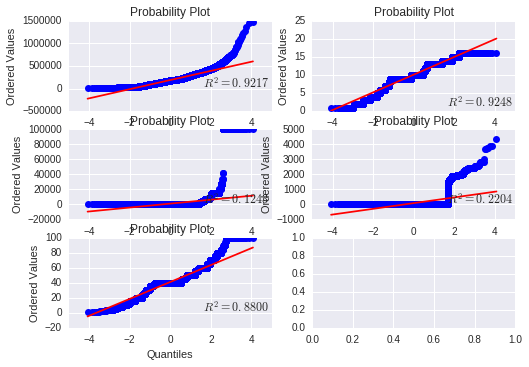

In [5]:
#-----------QQ PLOTS------------------------------
import scipy.stats as stats
import pylab
stats.probplot(data["Age"], dist="norm", plot=pylab)
pylab.subplot(321)
stats.probplot(data["fnlwgt"], dist="norm", plot=pylab)
pylab.subplot(322)
stats.probplot(data["Education-Num"], dist="norm", plot=pylab)
pylab.subplot(323)
stats.probplot(data["Capital_Gain"], dist="norm", plot=pylab)
pylab.subplot(324)
stats.probplot(data["Capital_Loss"], dist="norm", plot=pylab)
pylab.subplot(325)
stats.probplot(data["Hour"], dist="norm", plot=pylab)
pylab.subplot(326)

pylab.show()

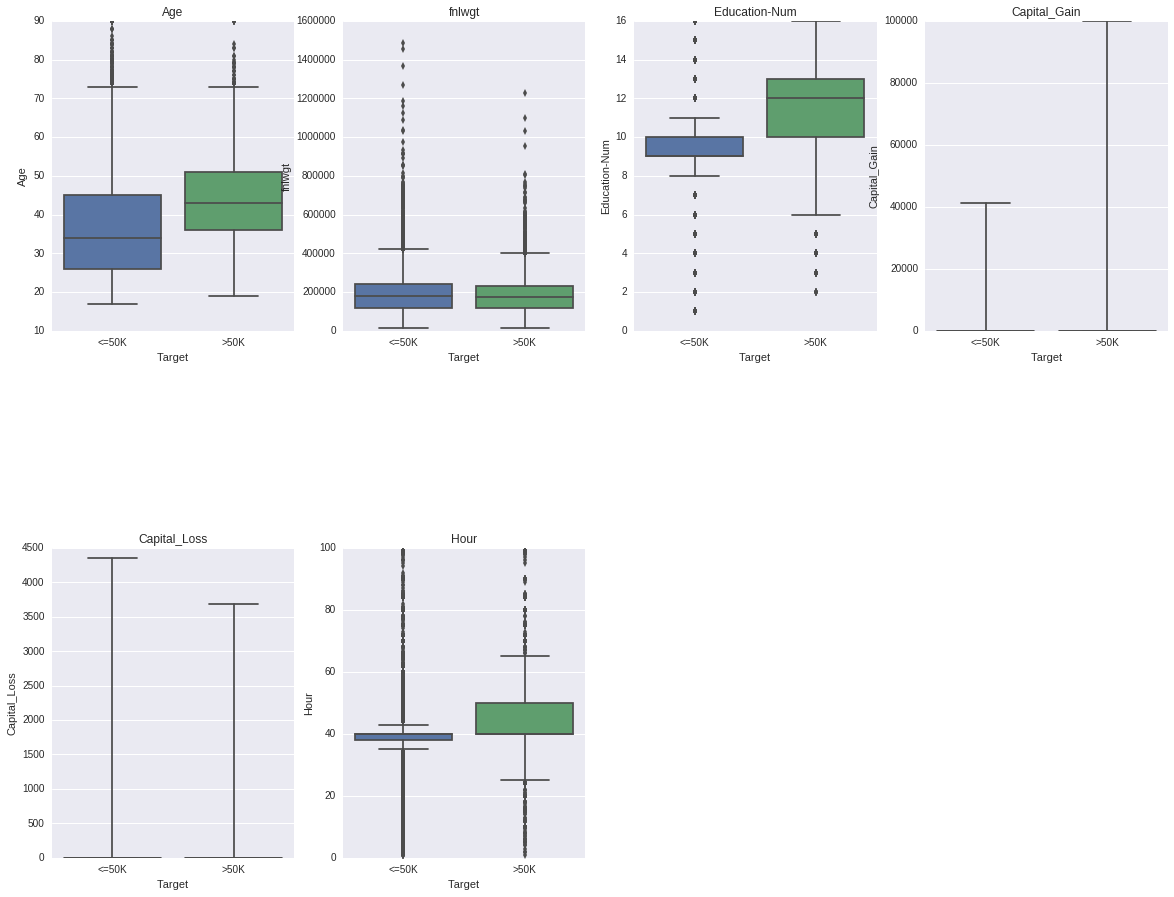

In [6]:
# -----------BOX PLOT-----------------------------
# import plotly.graph_objs as go
import math as m 
fig = plt.figure(figsize=(20,15))
cols = 4
rows = m.ceil(float(data.shape[1]) / cols)
j = 0 
for i, column in enumerate(data.columns):
    if data.dtypes[column] != np.object:
        j += 1
        ax = fig.add_subplot(2, cols, j)
        ax.set_title(column)
        sns.boxplot(x = data['Target'],y = data[column])
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

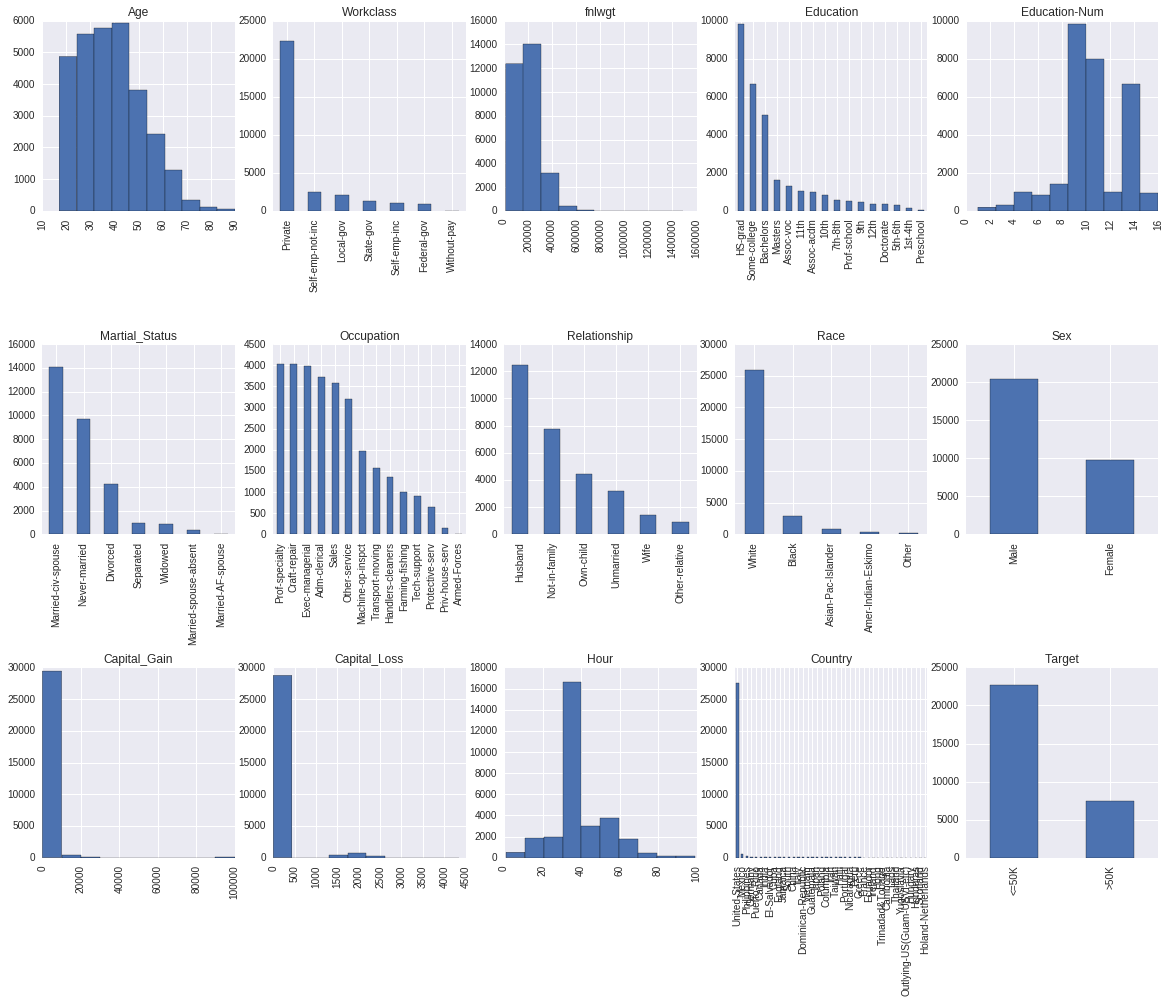

In [7]:
#------------HISTOGRAM-----------------------------
# Analyse Data

import math as m 
fig = plt.figure(figsize=(20,15))
cols = 5
rows = m.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()


In [ ]:
# -----------SCATTER PLOT-------------------------

pylab.subplot(331)
sns.regplot(data['Age'],data['fnlwgt'])
pylab.subplot(332)
sns.regplot(data['Age'],data['Education-Num'])
pylab.subplot(333)
sns.regplot(data['Age'],data['Capital_Gain'])
pylab.subplot(334)
sns.regplot(data['Age'],data['Capital_Loss'])
pylab.subplot(335)
sns.regplot(data['Age'],data['Hour'])
pylab.subplot(336)
sns.regplot(data['Education-Num'],data['fnlwgt'])
pylab.subplot(337)
sns.regplot(data['Education-Num'],data['Capital_Gain'])
pylab.subplot(338)
sns.regplot(data['Education-Num'],data['Capital_Loss'])
pylab.subplot(339)
sns.regplot(data['Education-Num'],data['Hour'])

plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

# data['Target'].head(5)

In [8]:
(data["Country"].value_counts() / data.shape[0]).head()

United-States    0.911876
Mexico           0.020224
Philippines      0.006233
Germany          0.004244
Puerto-Rico      0.003614
Name: Country, dtype: float64

## OBSERVATIONS
1. Most of the data is concentrated around US

### Correlation

1. Need to convert categorical variable into numerical variables. Using Label Encoder 
2. Remove correlated variables 

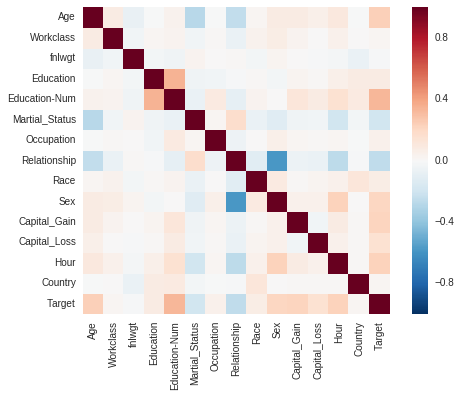

In [9]:
from sklearn import preprocessing
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
#     df.apply(preprocessing.LabelEncoder().fit_transform)
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
    
# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()
# Label encoder function in scikit-learn package is used  

In [10]:
data[["Education", "Education-Num"]].head(15)

,Education,Education-Num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


- We Remove Education column as Education and Education-Num are highly correlated.
- Now to model the data, we encode the categorical variable and create histograms

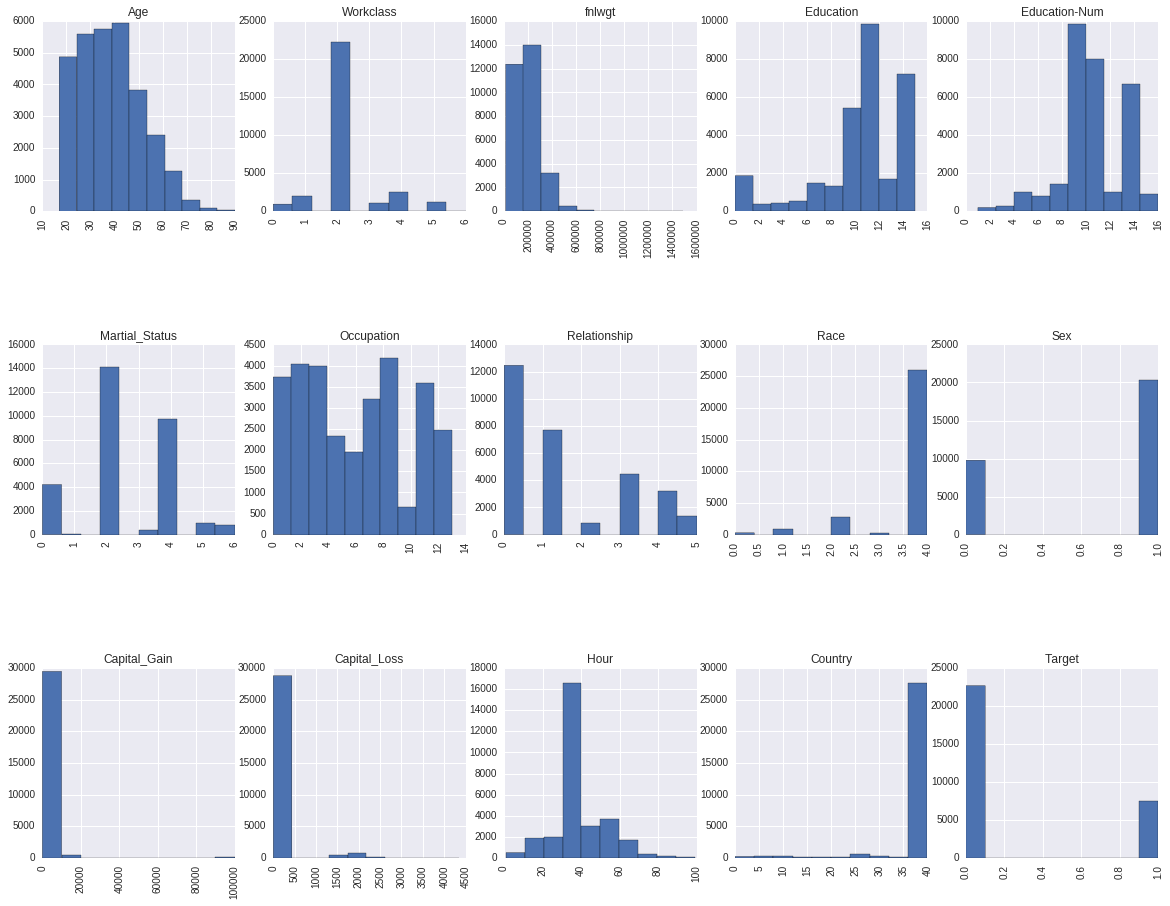

In [11]:
encoded_data, encoders = number_encode_features(data)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = m.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

Before modelling, we divide the data into train and test sets. We scale all the data with mean 0 and variance 1 using StandardScalar in scikit-learn

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns - ["Target"]], encoded_data["Target"], train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype('float64')), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))
# ?X_train.astype

/home/harshil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

using '-' to provide set differences with Indexes is deprecated, use .difference()



# 1 Logistic Regression

F1 score: 0.565309


/home/harshil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



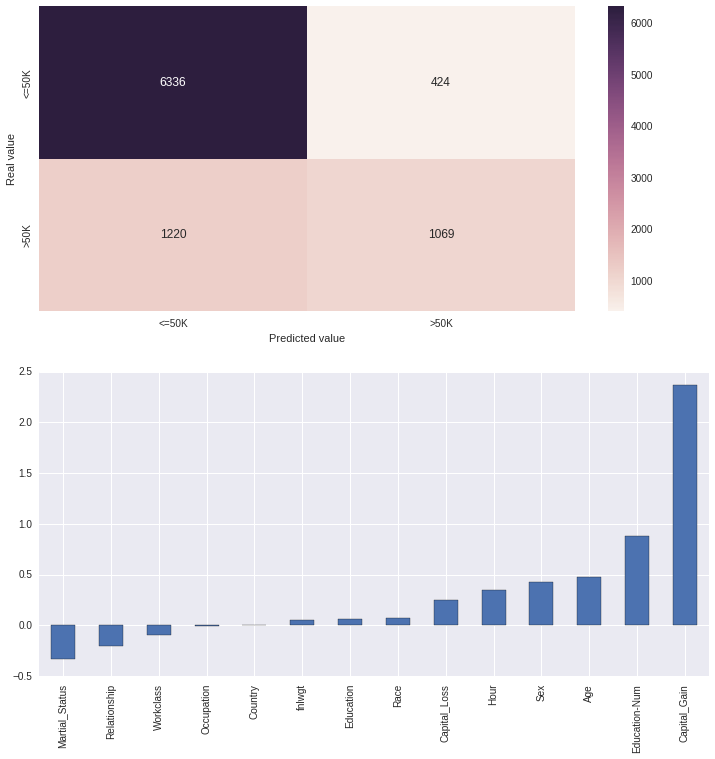

In [13]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print "F1 score: %f" % skl.metrics.f1_score(y_test, y_pred)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

Using Label encoding, the marital status values are ranging from 0 to 6 and the order is important. In practice there
is no particular order in that feature. We can fix the issue using binary features by inrtoducing dummy variables.

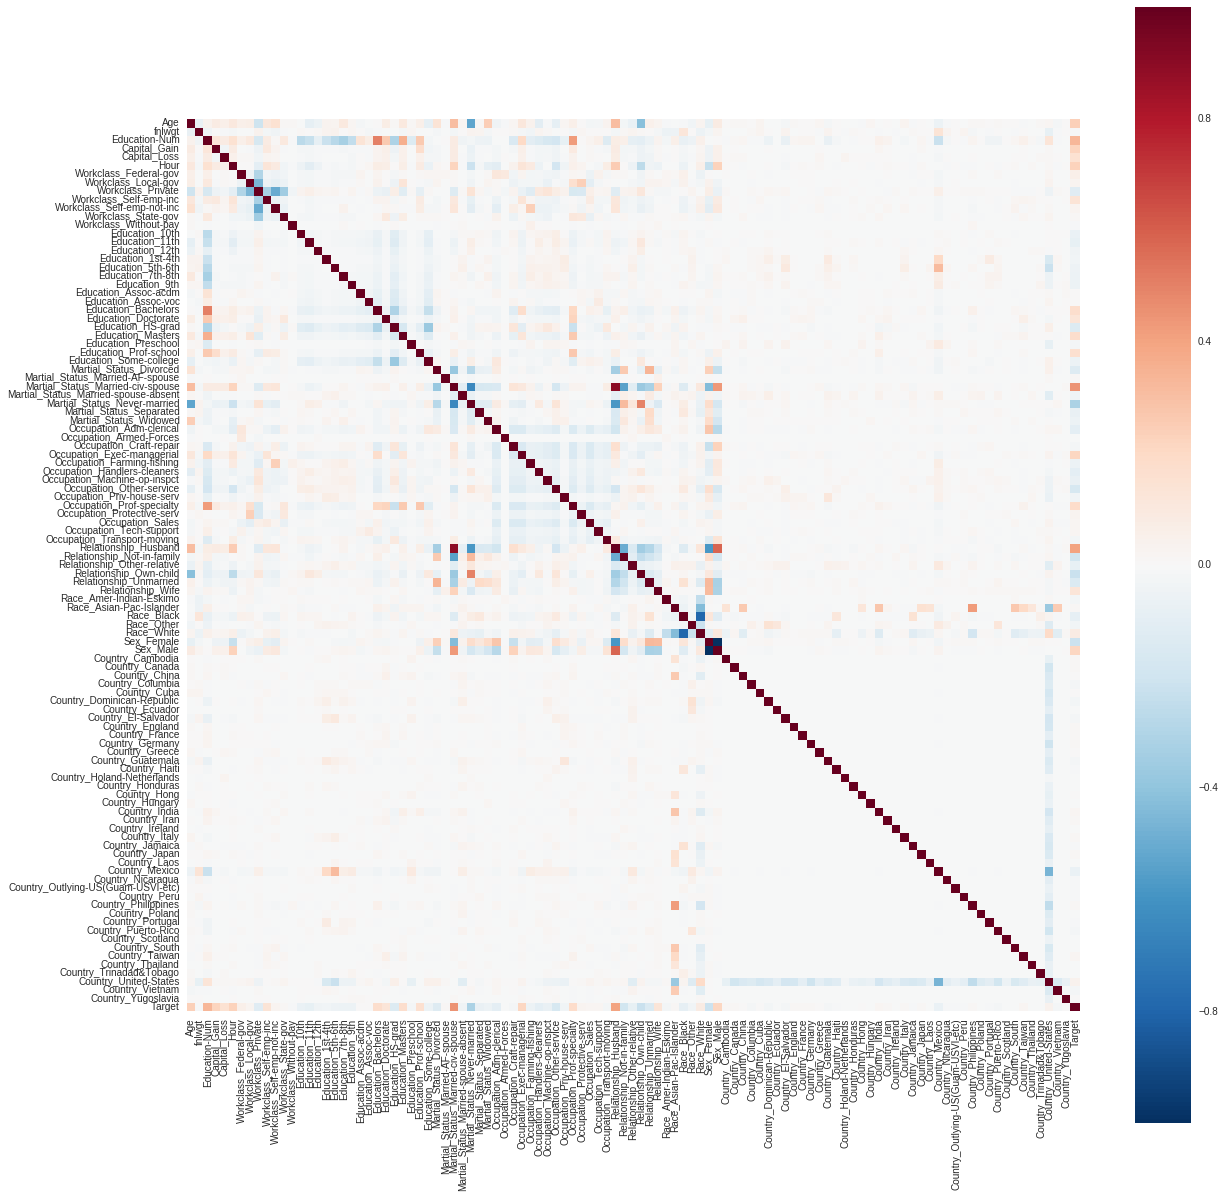

In [14]:
binary_data = pd.get_dummies(data)
# Let's fix the Target as it will be converted to dummy vars too
binary_data["Target"] = binary_data["Target_>50K"]
del binary_data["Target_<=50K"]
del binary_data["Target_>50K"]
plt.subplots(figsize=(20,20))
sns.heatmap(binary_data.corr(), square=True)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(binary_data[binary_data.columns - ["Target"]], binary_data["Target"], train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/home/harshil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

using '-' to provide set differences with Indexes is deprecated, use .difference()



### Logistic regression with dummy variables

F1 score: 0.662816


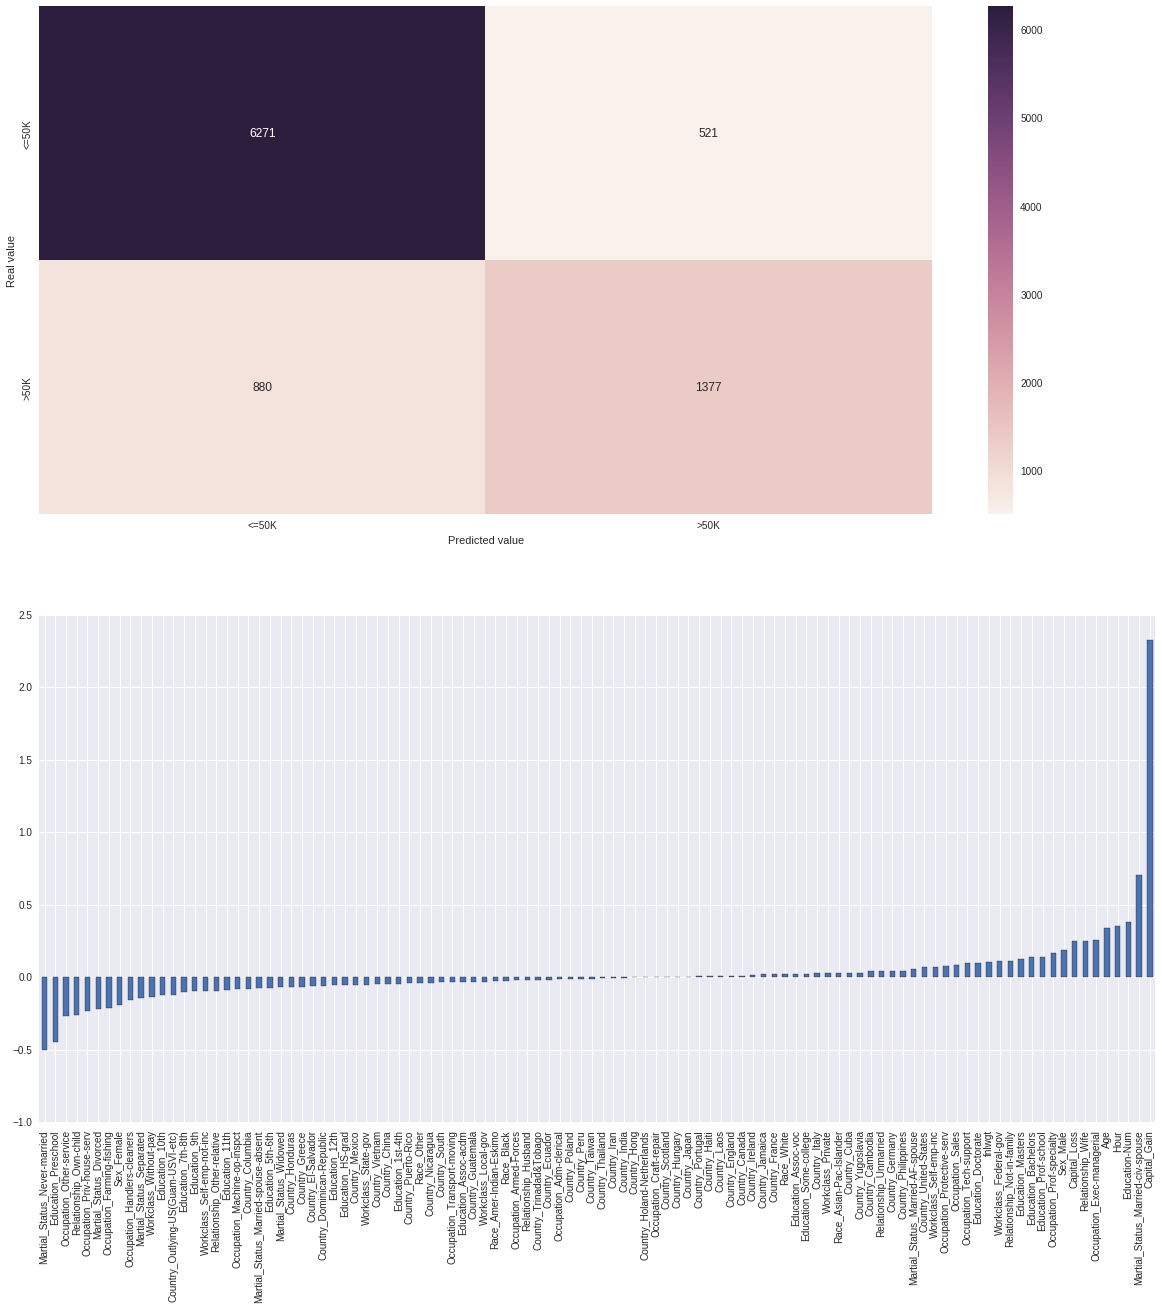

In [16]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print "F1 score: %f" % skl.metrics.f1_score(y_test, y_pred)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values(inplace=True)
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

# 2 Random Forest

In [20]:
# import libraries: dataframe manipulation, machine learning, os tools
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

# change working directory to where the dataset is
# os.chdir("C:/Users/JD87417/Desktop/python work/Coursera")

# Load the dataset (http://archive.ics.uci.edu/ml/datasets/Adult)
AH_data = pd.read_csv("./prepdata.csv")
# AH_data = AH_data.drop('(Intercept)',axis=1)
data_clean = AH_data.dropna()

# encode categorical features
# done in R (C:\Users\JD87417\Desktop\python work\Coursera\python_adult2_clean.R)
# do one hot encoding and name the columns

# summary statistics including counts, mean, stdev, quartiles
data_clean.head(n=1)
# data_clean.dtypes # data types of each variable
# data_clean.describe()


,age,workclassFederal-gov,workclassLocal-gov,workclassNever-worked,workclassPrivate,workclassSelf-emp-inc,workclassSelf-emp-not-inc,workclassState-gov,workclassWithout-pay,fnlwgt,...,native_countryPortugal,native_countryPuerto-Rico,native_countryScotland,native_countrySouth,native_countryTaiwan,native_countryThailand,native_countryUnited-States,native_countryVietnam,native_countryYugoslavia,income_target>50K
0,39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,0,1,0,0,0


In [21]:
data_clean["Education_num"].head(1)

0    13
Name: Education_num, dtype: int64

In [22]:

# Split into training and testing sets
# Specifying predictor x variables

predictors = data_clean[["age", "workclassLocal-gov", "workclassPrivate",
"workclassSelf-emp-inc", "workclassSelf-emp-not-inc", "workclassState-gov",
"workclassWithout-pay", "fnlwgt", "education11th", "education12th",
"education1st-4th", "education5th-6th", "education7th-8th", "education9th",
"educationAssoc-acdm", "educationAssoc-voc", "educationBachelors",
"educationDoctorate", "educationHS-grad", "educationMasters",
"educationPreschool", "educationProf-school", "educationSome-college",
"Education_num", "martial_statusMarried-AF-spouse", "martial_statusMarried-civ-spouse",
"martial_statusMarried-spouse-absent", "martial_statusNever-married",
"martial_statusSeparated", "martial_statusWidowed", "occupationArmed-Forces",
"occupationCraft-repair", "occupationExec-managerial", "occupationFarming-fishing",
"occupationHandlers-cleaners", "occupationMachine-op-inspct",
"occupationOther-service", "occupationPriv-house-serv", "occupationProf-specialty",
"occupationProtective-serv", "occupationSales", "occupationTech-support",
"occupationTransport-moving", "relationshipNot-in-family", "relationshipOther-relative",
"relationshipOwn-child", "relationshipUnmarried", "relationshipWife",
"raceAsian-Pac-Islander", "raceBlack", "raceOther", "raceWhite",
"sexMale", "capital_gain", "capital_loss", "hours_per_week",
"native_countryCanada", "native_countryChina", "native_countryColumbia",
"native_countryCuba", "native_countryDominican-Republic", "native_countryEcuador",
"native_countryEl-Salvador", "native_countryEngland", "native_countryFrance",
"native_countryGermany", "native_countryGreece", "native_countryGuatemala",
"native_countryHaiti", "native_countryHoland-Netherlands", "native_countryHonduras",
"native_countryHong", "native_countryHungary", "native_countryIndia",
"native_countryIran", "native_countryIreland", "native_countryItaly",
"native_countryJamaica", "native_countryJapan", "native_countryLaos",
"native_countryMexico", "native_countryNicaragua", "native_countryOutlying-US(Guam-USVI-etc)",
"native_countryPeru", "native_countryPhilippines", "native_countryPoland",
"native_countryPortugal", "native_countryPuerto-Rico", "native_countryScotland",
"native_countrySouth", "native_countryTaiwan", "native_countryThailand",
"native_countryUnited-States",
"native_countryVietnam", "native_countryYugoslavia"]]


In [23]:
# y repsonse variable
targets = data_clean

# concurrent split of x's, y, at 40%
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

# shape/dimensions of the DataFrame
print pred_train.shape
print pred_test.shape
print tar_train.shape
print tar_test.shape

(19536, 95)
(13025, 95)
(19536, 100)
(13025, 100)


In [ ]:
# Build model on training data
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the amount of trees to build
classifier=RandomForestClassifier(n_estimators=10)
# fit the RandomForest Model
classifier=classifier.fit(pred_train,tar_train)
# prediction scoring of the model (array of binary 0-1)
predictions=classifier.predict(pred_test)
# confusion matrix / missclassification matrix
sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)



In [ ]:
print(max(model.feature_importances_))
max_val = np.where(model.feature_importances_ == max(model.feature_importances_))

min_val = np.where(model.feature_importances_ == min(model.feature_importances_))



In [ ]:
print(max_val, min_val)

In [ ]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

plt.cla()
plt.plot(trees, accuracy)
plt.show()

# Gradient Boosting

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv("/home/harshil/BDAP/Python Code/adultdata.csv", names = ["Age", "Workclass", "fnlwgt", 
        "Education", "Education-Num", "Martial_Status","Occupation", "Relationship", "Race", "Sex",
        "Capital_Gain", "Capital_Loss","Hour", "Country", "Target"],
        sep=r'\s*,\s*',engine='python',na_values="?")
data = data.dropna()
# train = pd.read_csv('train_modified.csv')
target = 'income_target>50K'
IDcol = 'ID'

In [25]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['income_target>50K'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['income_target>50K'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['income_target>50K'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['income_target>50K'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8686
AUC Score (Train): 0.925668
CV Score : Mean - 0.9213896 | Std - 0.002662889 | Min - 0.917174 | Max - 0.9244653


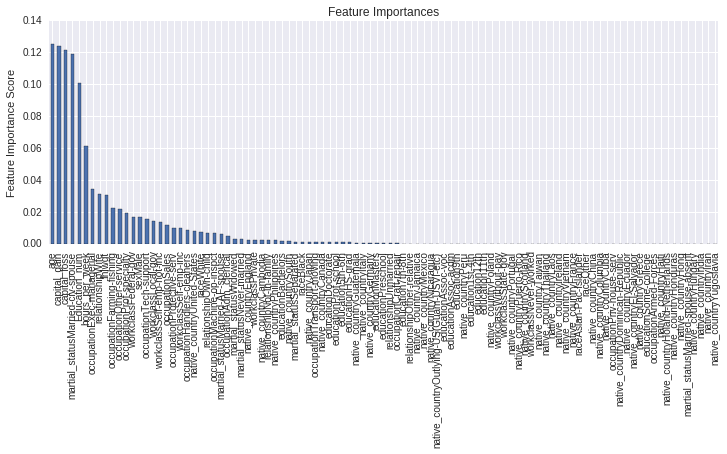

In [26]:

#Choose all predictors except target & IDcols
predictors = [x for x in data_clean.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, data_clean, predictors)

# SVM

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

data = pd.read_csv("/home/harshil/BDAP/Python Code/adultdata.csv", names = ["Age", "Workclass", "fnlwgt", 
        "Education", "Education-Num", "Martial_Status","Occupation", "Relationship", "Race", "Sex",
        "Capital_Gain", "Capital_Loss","Hour", "Country", "Target"],
        sep=r'\s*,\s*',engine='python',na_values="?")
data = data.dropna()


In [28]:
data['Target']
data['Target'] = [1 if x == '<=50K' else 0 for x in data['Target']]
data = data.dropna()

In [29]:
from sklearn import preprocessing
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
#     df.apply(preprocessing.LabelEncoder().fit_transform)
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
    
# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
asf = encoded_data
asf.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hour,Country,Target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,1
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,1
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,1
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,1
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,1


In [30]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns - ["Target"]], encoded_data["Target"], train_size=0.70)


/home/harshil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

using '-' to provide set differences with Indexes is deprecated, use .difference()



In [31]:
X_train = X_train[0:100]
X_test = X_test[0:10]
y_train = y_train[0:100]
y_test = y_test[0:10]


In [32]:
X_train.shape
X_test.shape

(10, 14)

In [33]:
data_clean.head(1)

,age,workclassFederal-gov,workclassLocal-gov,workclassNever-worked,workclassPrivate,workclassSelf-emp-inc,workclassSelf-emp-not-inc,workclassState-gov,workclassWithout-pay,fnlwgt,...,native_countryPortugal,native_countryPuerto-Rico,native_countryScotland,native_countrySouth,native_countryTaiwan,native_countryThailand,native_countryUnited-States,native_countryVietnam,native_countryYugoslavia,income_target>50K
0,39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,0,1,0,0,0


In [34]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
# type(train)


svc.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
svc.score(X_train, y_train)

0.77000000000000002

In [36]:
predicted= svc.predict(X_test)
print y_test
print predicted

30442    1
18562    1
2460     0
19339    1
18049    1
25739    0
24653    1
30958    1
31604    0
26042    1
Name: Target, dtype: int64
[1 1 0 1 1 1 1 1 1 1]


In [38]:
import sklearn.metrics as skm
skm.confusion_matrix(predicted, y_test)
# skm.scorer

array([[1, 0],
       [2, 7]])